# Tiga Teknik Exploratory Data Analysis Menggunakan Python

Saat membuat projek data science, Exploratory Data Analysis (EDA) adalah step yang sangat penting untuk mengerti data. Pada flowchart project Data Science menurut IBM dibawah, EDA ada di dalam fase 'Data Understanding'

In [23]:
#import library 

from IPython.display import display, Image

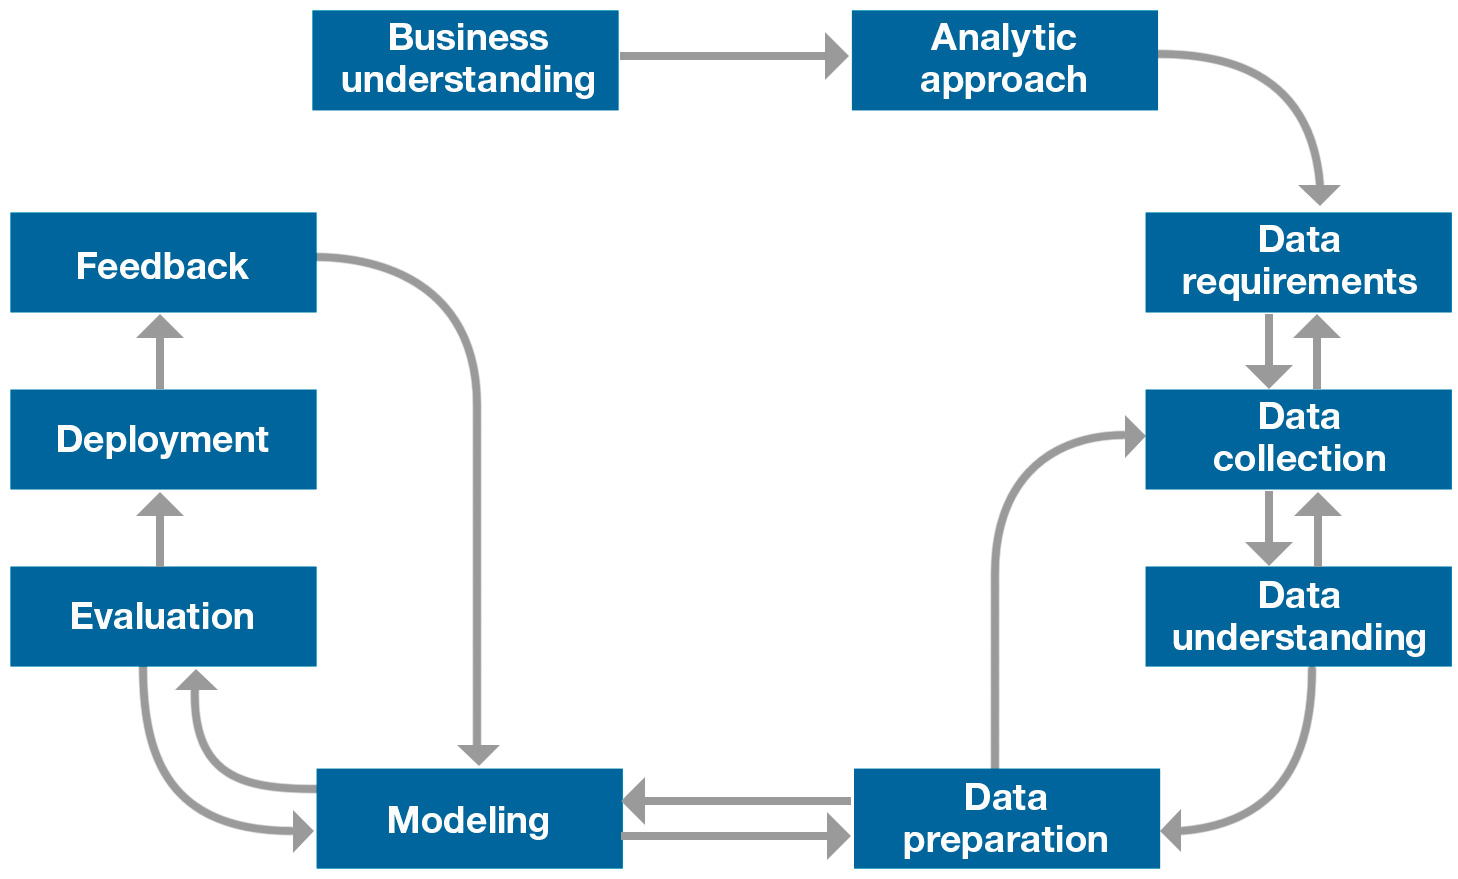

In [13]:
display(Image(filename='DS_flowchart.jpg'))

Tujuan utama dari EDA adalah untuk **mengerti dataset lebih dalam** dan **mendapatkan insight secara langsung dari dataset tersebut**

## Import Dataset

Untuk projek kali ini, kita akan menggunakan dataset booking hotel, dengan target untuk **mengetahui booking hotel seperti apa yang akan di cancel**

Note: Kita tidak akan melakukan Modelling tetapi hanya hingga EDA untuk tahap ini.

In [15]:
# import library
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# import dataset
booking = pd.read_csv("hotel_bookings.csv")

## Mengecheck variabel

Setelah mengupload data kita dapat menggunakan 'head()' untuk melihat 5 hasil observasi pertama. 

In [16]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Jika ingin melihat 5 hasil observasi terakhir maka fungsi 'tail()' dapat digunakan. Kita juga dapat melihat sebanyak X hasil observasi pertama dan terakhir menggunakan 'head(X)' dan 'tail(X)'. 

In [9]:
# Melihat 7 observasi terakhir
booking.tail(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Dari data diatas, kita dapat melihat bahwa **variabel 'is_canceled' adalah *output* atau *target*** yang kita inginkan. Dengan begitu, variabel lain adalah *input* atau akan kita sebut dengan *predictor*.

Fungsi 'shape' dapat digunakan untuk mengetahui variable (kolom atau column) dan jumlah observasi (baris atau row).

In [10]:
booking.shape

(119390, 32)

Data booking memiliki 32 variables dan 119390 observasi.

Kemudian, cek type dari masing-masing variable menggunakan fungsi 'info()'.

In [11]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari informasi diatas kita bisa membagi varial dari dataset booking kita menjadi variabel **kategorikal** dan **numerikal**.

**Variabel Kategorik:**
1. hotel                           
2. arrival_date_month             
3. meal                           
4. country                        
5. market_segment                 
6. distribution_channel            
7. reserved_room_type             
8. assigned_room_type             
9. deposit_type                   
10. customer_type                 
11. reservation_status             
12. reservation_status_date        

**Variabel Numerik:**
1. is_canceled                     
2. lead_time                         
3. arrival_date_year                               
4. arrival_date_week_number        
5.   arrival_date_day_of_month       
6.   stays_in_weekend_nights           
7.   stays_in_week_nights            
8.   adults                         
9.  children                        
10.  babies                         
11.  is_repeated_guest             
12.  previous_cancellations          
13.  previous_bookings_not_canceled     
14.  booking_changes                   
15.  agent                          
16.  company                        
17.  days_in_waiting_list           
18.  adr                            
19.  required_car_parking_spaces   
20.  total_of_special_requests      

Setelah eksplorasi variabel kita akan melakukan 3 teknik analisa ekplorasi data lainnya yang paling sering dilakukan:

1. Analisa Korelasi Variabel Numerik
2. Analisa Boxplot Variabel Numerik
3. Analisa Frekuensi

## Analisa Korelasi Variabel Numerik

Analisa korelasi penting untuk mengetahui relasi antara variabel numerik. Relasi ini bisa positif (maks. 1) yang artinya berbanding berbanding lurus, dan negatif (maks.-1) yang artinya berbanding terbalik.

Untuk melihat korelasi ini, kita akan menggunakan fungsi 'heatmap' dari library 'seaborn'.

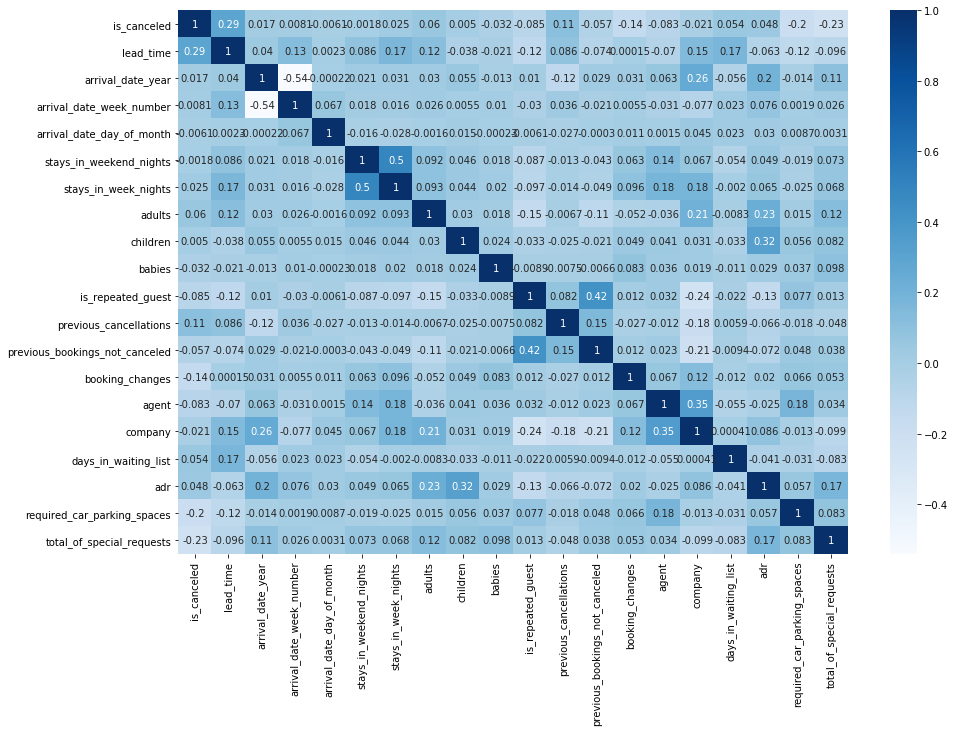

In [59]:
plt.figure(figsize=(15,10))  
corrMatrix = booking.corr()
sn.heatmap(corrMatrix, annot = True, cmap="Blues")
plt.show()

Dari heatmap diatas, dapat bisa melihat bahwa predictors yang dimiliki oleh dataset kita tidak relatif independen antara satu dan yang lain. 

Sebisa mungkin, kita tidak memiliki variabel predictor yang memiliki dependensi positif tinggi satu sama lain. Karena hal ini dapat berarti bahwa mungkin hanya salah satu variabel tersebut yang dibutuhkan.

## Analisa Boxplot Variabel Numerik

Analisa boxplot ini dilakukan untuk memeriksa apakah ada outlier pada predictors numerik tertentu, kecuali predictors waktu. Untuk projek kali ini, kita akan membuat boxplot untuk predictors 'stays_in_week_nights'

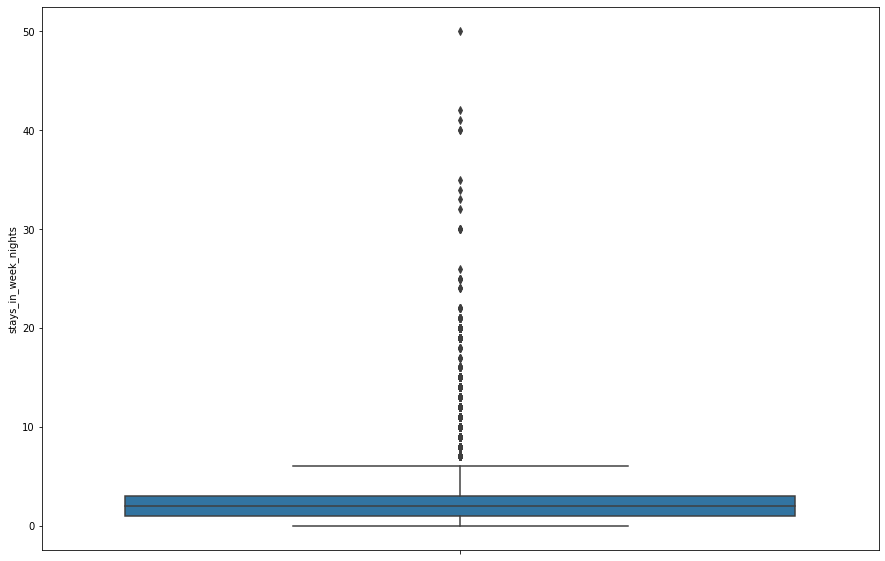

In [67]:
plt.figure(figsize=(15,10)) 
sn.boxplot(data = booking, y='stays_in_week_nights')

Pada boxplot diatas tersebut terdapat outlier. Tetapi apakah artinya kita harus menghapus observasi tersebut?

Jawabannya adalah tergantung business case yang kita sedang kerjakan. 

Contohnya, jika kita menghapus outlier dari predictors 'stays_in_week_nights', maka model yang akan kita buat tidak akan mempunyai observasi training saat predictor tersebut bernilai 10,20,30 atau 40. 

Jika business case yang ingin kita pecahkan membutuhkan nilai observasi tersebut, maka kita tidak dapat menghapusnya. Yang dapat kita lakukan adalah mengambil sample data lebih banyak lagi sehingga nilai tersebut tidak menjadi outliers lagi. 

## Analisa Frekuensi

Analisa frekuensi dilakukan untuk dapat melihat berapa kali suatu nilai observasi muncul dalam sebuah dataset.Dengan analisa ini kita bisa mengetahui apakah dataset kita *balance* dan juga mendapatkan insight secara langsung dari dataset.

Analisa ini dapat diterapkan pada variabel kategorikal dan juga variabel numerikal. Hanya saja variabel numerikal akan dibagi menjadi dua, yaitu: diskrit dan *continous*, karena perbedaan teknik analisa seperti berikut:

1. Variabel kategorikal ==> Menggunakan countplot
2. Variabel numerikal diskrit (i.e.: tahun) ==> Menggunakan countplot
3. Variabel numerikal *continous* ==> Menggunakan histogram

Agar dapat mengetahui apakah dataset kita balance atau tidak, maka kita akan melakukan analisa frekuensi pada variabel target 'is_canceled'

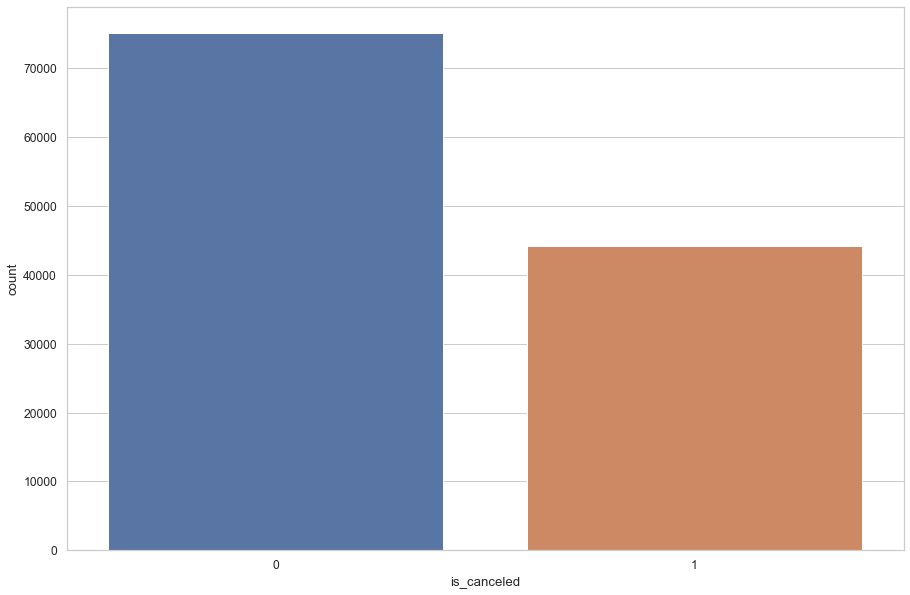

In [73]:
plt.figure(figsize=(15,10)) 
#booking_cancel = booking.filter('is_canceled' == 1)
sn.countplot(booking['is_canceled']);

Dari grafik diatas nilai dari target kita berbanding 60%:40% (0:1), yang berarti dataset kita dapat dikatakan *balance*. 

Jika hanya salah satu nilai dari target kita mendominasi lebih dari 90% (rule-of-thumbs), maka data kita dapat dikatakan imbalance, dan model yang akan memiliki tendensi untuk memprediksi nilai tersebut.

Melalui analisa frekuensi kita juga dapat mendapatkan insight secara langsung dari dataset. 
Mari kita lihat analisa frekuensi untuk variabel kategorik 'arrival_date_month'.

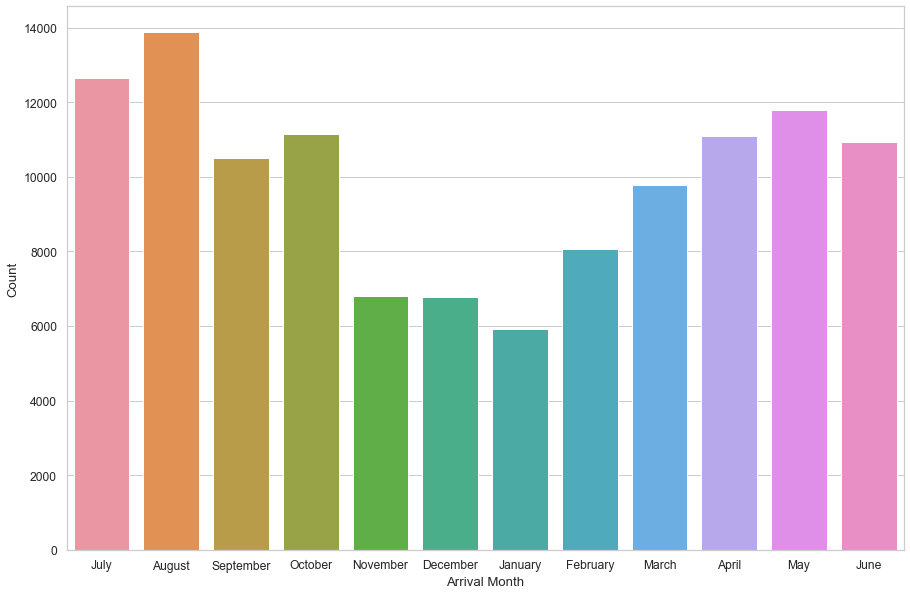

In [91]:
plt.figure(figsize=(15,10)) 
#booking_cancel = booking.filter('is_canceled' == 1)
sn.countplot(booking['arrival_date_month']).set(xlabel='Arrival Month', ylabel='Count');

Dari grafik diatas dapat ditarik *insight* bahwa, bulan kedatangan yang paling sering adalah pada bulan agustus, dimana merupakan waktu dari libur musim panas.

Kita juga dapat melakukan analisa terhadap variabel numerik, seperti pada variabel 'stays_in_week_nights' menggunakan histogram.

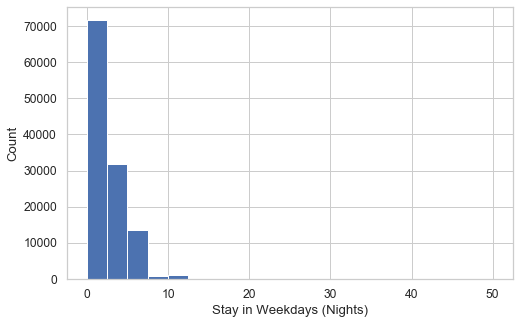

In [92]:
sn.distplot(
    booking['stays_in_week_nights'], kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Stay in Weekdays (Nights)', ylabel='Count');

Dari grafik histogram diatas, bahwa rata-rata calon pengunjung melakukan booking untuk tinggal selama 1-3 malam

## Kesimpulan

Exploratory Data Analysis adalah step yang sangat penting dalam projek data science di dalam fase Data Understanding. Hal yang paling pertama harus dilakukan adalah mencaritahu variabel dan observasi apa saja yang ada pada dataset. Setelah itu, kita dapat melakukan berbagai analisis, seperti:

1. Analisa korelasi pada variabel numerik untuk mengetahui dependansi antar variabel.
2. Analisa boxplot pada varabel numerik untuk memeriksa keberadaan outlier (Tidak semua outlier harus dihapuskan, tergantung pada business case yang ingin dipecahkan).
3. Analisa frekuensi agar mengetahui apakah dataset yang digunakan sudah balance dan untuk mencari insight dari dataset tanpa harus melakukan modeling.

Selain tiga teknik diatas, masih banyak jenis analisa EDA lainnya yang dapat kita gunakan dan tools lain yang dapat dipakai. Oleh karena itu jangan berhenti belajar dan mencoba!
